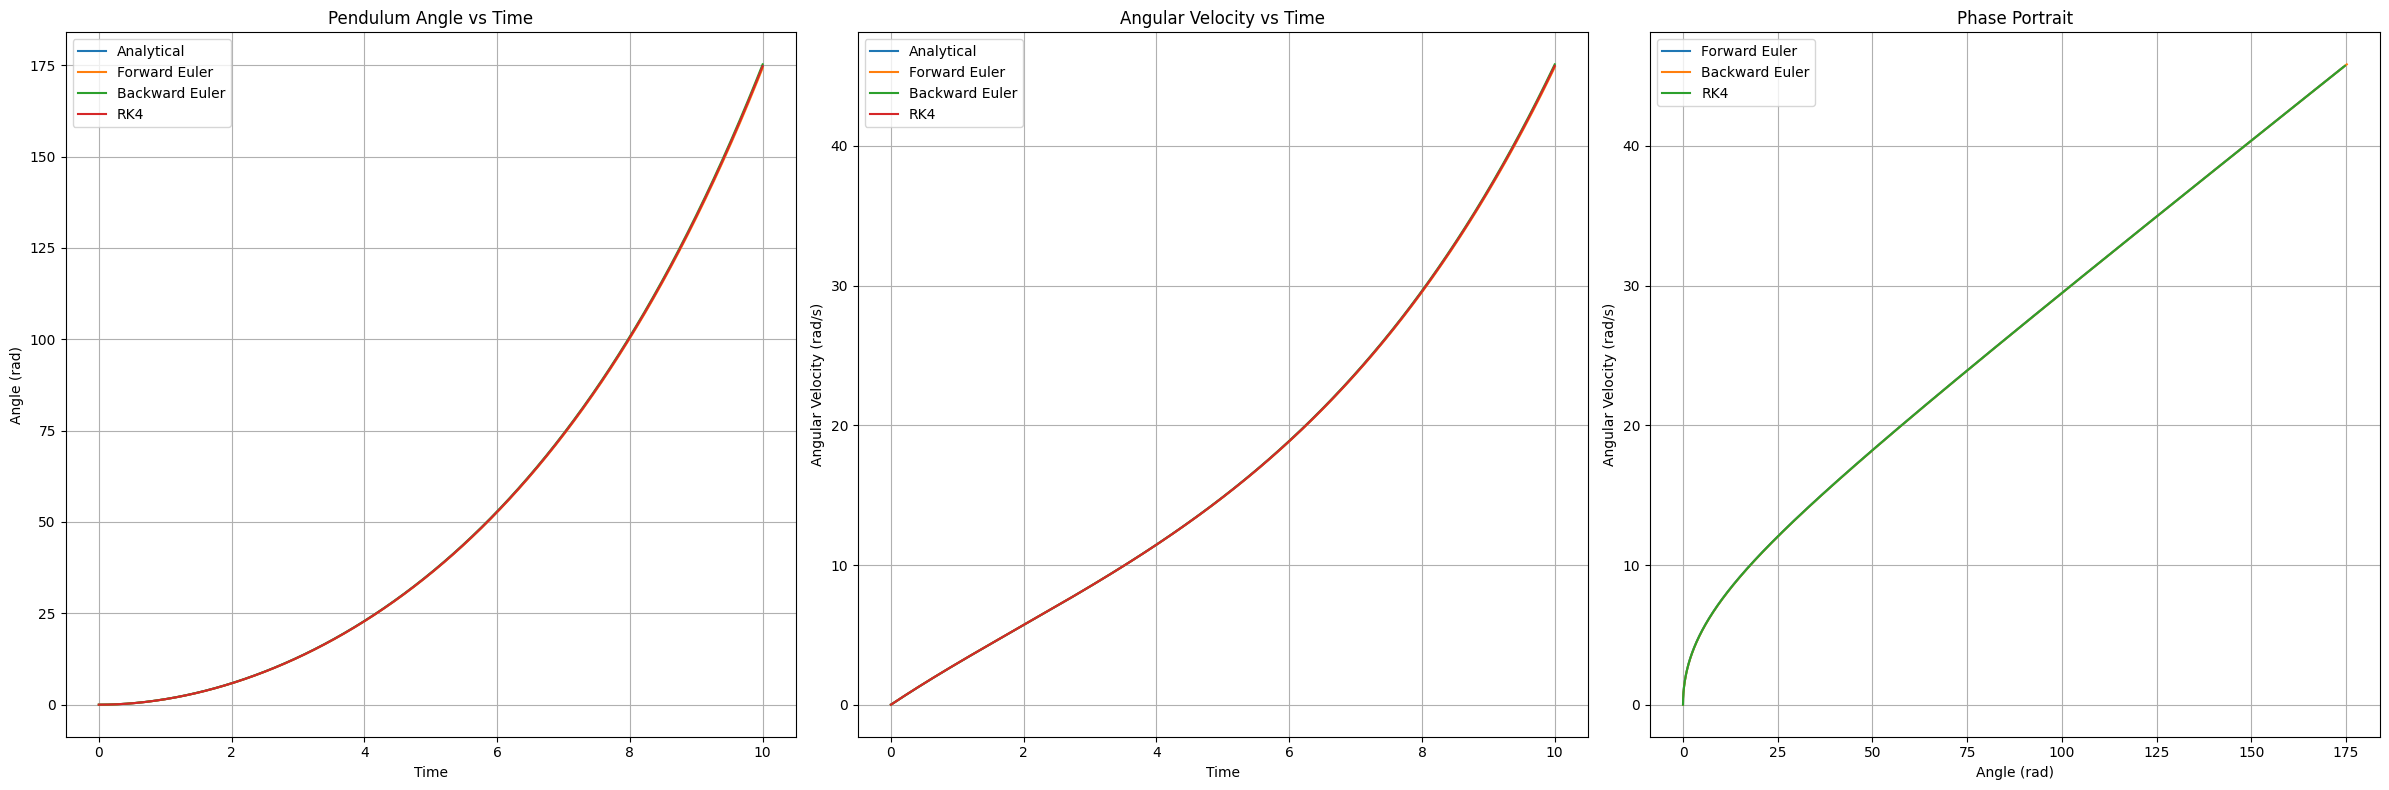

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = -2.35
b = -0.38
c = 0.19
d = -7.44
x0_val = 0.0
v0_val = 0.0
Tf = 10.0
h = 0.01
t = np.arange(0, Tf + h, h)

def ode_system(x):
   x1 = x[0]
   x2 = x[1]
   dx1 = x2
   dx2 = (d - b * x2 - c *x1)/a
   return np.array([dx1, dx2])

def forward_euler(fun, x0, Tf, h):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])
    
    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  
        
        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next
            
            if error < tol:
                break
    
    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):

    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    
    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)
        
        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)
    
    return x_hist, t

p = b / a
q = c / a
s = d / a
x_p = d / c

D = p**2 - 4.0 * q

if D > 1e-12:

    r1 = (-p + np.sqrt(D)) / 2.0
    r2 = (-p - np.sqrt(D)) / 2.0

    A = np.array([[1.0, 1.0],
                  [r1,  r2]])
    b_ic = np.array([x0_val - x_p,
                     v0_val])
    C1, C2 = np.linalg.solve(A, b_ic)

    x_an = C1 * np.exp(r1 * t) + C2 * np.exp(r2 * t) + x_p

elif abs(D) <= 1e-12:

    r = -p / 2.0

    C1 = x0_val - x_p
    C2 = v0_val - r * C1

    x_an = (C1 + C2 * t) * np.exp(r * t) + x_p

else:

    alpha = -p / 2.0
    beta = 0.5 * np.sqrt(-D)

    C1 = x0_val - x_p
    C2 = (v0_val + alpha * C1) / beta

    x_an = np.exp(alpha * t) * (C1 * np.cos(beta * t) + C2 * np.sin(beta * t)) + x_p

x0_vec = np.array([x0_val, v0_val]) 

x_fe, t_fe = forward_euler(ode_system, x0_vec, Tf, h)
x_be, t_be = backward_euler(ode_system, x0_vec, Tf, h)
x_rk4, t_rk4 = runge_kutta4(ode_system, x0_vec, Tf, h)


plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_an, label='Analytical')
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum Angle vs Time')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(t_fe, np.gradient(x_an, h), label='Analytical')
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler') 
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Angular Velocity vs Time')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Phase Portrait')
plt.grid(True)

plt.tight_layout()
plt.show()
